#Case - Engenharia de Dados - NEUROTECH

###Candidato: Aldenis Everton Alves Guilherme de França

###Importação de Bibliotecas

In [1]:
# Bibliotecas para modelagem de dados
import pandas as pd
import numpy as np
import glob

# Bibliotecas para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas/classes para tratamento dos dados categóricos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Bibliotecas/classes para normalização dos dados
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 

###Importação da Base de Dados

In [2]:
# Leitura e concatenação das 648 planilhas da base de dados.

path = r'drive/MyDrive/Desafio_NeuroTech'
files_cons = glob.glob(path + '/*CONS.csv')
files_det = glob.glob(path + '/*DET.csv')

list_cons = []
list_det = []

for i in files_cons:
  dataset_cons = pd.read_csv(i, sep=',', header=0, encoding='ISO-8859-1')
  list_cons.append(dataset_cons)

for j in files_det:
  dataset_det = pd.read_csv(j, sep=',', header=0, encoding='ISO-8859-1')
  list_det.append(dataset_det)

df_cons = pd.concat(list_cons, axis=0, ignore_index=True)
df_det = pd.concat(list_det, axis=0, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###Construção da Tabela Única

In [5]:
# Integração dos dados das tabelas CONS e DET.
df_completo = pd.merge(df_det, df_cons, how='left', on=['#ID_EVENTO','UF_PRESTADOR','LG_OUTLIER'])

###Análise Exploratória dos Dados

#####Dimensão dos Dados

In [4]:
# Especificação do número de linhas e colunas da tabela consolidada.
print(f'QUANTIDADE DE LINHAS: {df_completo.shape[0]}\n')
print(f'QUANTIDADE DE COLUNAS: {df_completo.shape[1]}')

QUANTIDADE DE LINHAS: 34445720

QUANTIDADE DE COLUNAS: 32


#####Apresentação dos Dados

In [5]:
# Visualização parcial da tabela consolidada.
df_completo.head()

,#ID_EVENTO,CD_TUSS_PROCEDIMENTO,QT_PROCEDIMENTO,VL_PROCEDIMENTO,VL_PAGO_FORNECEDOR,CD_TABELA_REFERENCIA,LG_PACOTE,IND_TABELA_PROPRIA,DT_INICIO_EVENTO,UF_PRESTADOR,LG_OUTLIER,ID_PLANO,IDADE_BENEFICIARIO,SEXO_BENEFICIARIO,CD_MUNIC_BENEFICIARIO,PORTE_OPERADORA,CD_MODALIDADE_OPERADORA,MODALIDADE_OPERADORA,CD_MUNIC_PRESTADOR,DT_INTERNACAO,DT_SAIDA_INTERNACAO,CARATER_ATENDIMENTO,TIPO_INTERNACAO,REGIME_INTERNACAO,MOTIVO_ENCERRAMENTO,CID_1,CID_2,CID_3,CID_4,NR_DIARIAS_ACOMPANHANTE,NR_DIARIAS_UTI,LG_VALOR_PREESTABELECIDO
0,2734762035,031,4.0,429.96,0.0,63,0,0,01/07/2019,AL,0,117789.0,44.0,M,270430.0,GRANDE,28.0,Seguradora Especializada Em Saúde,270430.0,01/07/2019,01/07/2019,1,2.0,1.0,12.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,3084104673,10103023,1.0,282.56,0.0,22,0,0,01/07/2019,AL,0,124053.0,34.0,F,230440.0,GRANDE,28.0,Seguradora Especializada Em Saúde,270730.0,01/07/2019,03/07/2019,2,3.0,1.0,11.0,O420,NaN,NaN,NaN,0.0,0.0,0.0
2,2788329148,029,83.0,563.74,0.0,63,0,0,01/07/2019,AL,0,94973.0,43.0,F,270430.0,GRANDE,22.0,Cooperativa Médica,270430.0,01/07/2019,01/07/2019,1,2.0,1.0,12.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2788329148,030,23.0,220.20,0.0,63,0,0,01/07/2019,AL,0,94973.0,43.0,F,270430.0,GRANDE,22.0,Cooperativa Médica,270430.0,01/07/2019,01/07/2019,1,2.0,1.0,12.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2788329148,031,3.0,490.57,0.0,63,0,0,01/07/2019,AL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Nomes das colunas da base consolidada.
df_completo.columns

Index(['#ID_EVENTO', 'CD_TUSS_PROCEDIMENTO', 'QT_PROCEDIMENTO',
       'VL_PROCEDIMENTO', 'VL_PAGO_FORNECEDOR', 'CD_TABELA_REFERENCIA',
       'LG_PACOTE', 'IND_TABELA_PROPRIA', 'DT_INICIO_EVENTO', 'UF_PRESTADOR',
       'LG_OUTLIER', 'ID_PLANO', 'IDADE_BENEFICIARIO', 'SEXO_BENEFICIARIO',
       'CD_MUNIC_BENEFICIARIO', 'PORTE_OPERADORA', 'CD_MODALIDADE_OPERADORA',
       'MODALIDADE_OPERADORA', 'CD_MUNIC_PRESTADOR', 'DT_INTERNACAO',
       'DT_SAIDA_INTERNACAO', 'CARATER_ATENDIMENTO', 'TIPO_INTERNACAO',
       'REGIME_INTERNACAO', 'MOTIVO_ENCERRAMENTO', 'CID_1', 'CID_2', 'CID_3',
       'CID_4', 'NR_DIARIAS_ACOMPANHANTE', 'NR_DIARIAS_UTI',
       'LG_VALOR_PREESTABELECIDO'],
      dtype='object')

#####Informações Estatísticas dos Dados

In [7]:
# Métricas estatísticas da tabela CONS.
df_cons.describe(percentiles = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9])

,#ID_EVENTO,ID_PLANO,IDADE_BENEFICIARIO,CD_MUNIC_BENEFICIARIO,CD_MODALIDADE_OPERADORA,CD_MUNIC_PRESTADOR,TIPO_INTERNACAO,REGIME_INTERNACAO,MOTIVO_ENCERRAMENTO,NR_DIARIAS_ACOMPANHANTE,NR_DIARIAS_UTI,LG_VALOR_PREESTABELECIDO,LG_OUTLIER
count,5.291128e+06,5.291128e+06,5.186012e+06,5.185041e+06,5.291128e+06,5.291128e+06,5.288671e+06,5.226616e+06,5.290273e+06,5.291128e+06,5.291128e+06,5.291128e+06,5.291128e+06
mean,2.714592e+09,9.145680e+04,4.787002e+01,3.445989e+05,2.389106e+01,3.460517e+05,1.832813e+00,1.145174e+00,1.658657e+01,1.152586e-01,2.268146e-01,4.857376e-03,4.190316e-02
std,2.001352e+08,8.130979e+04,2.432759e+01,7.935518e+04,1.808672e+00,7.916461e+04,9.872537e-01,4.226704e-01,1.129493e+01,1.244336e+00,2.914723e+00,6.952541e-02,2.003679e-01
min,2.191282e+09,3.000000e+00,0.000000e+00,1.100000e+05,2.200000e+01,1.100010e+05,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10%,2.440204e+09,2.218400e+04,1.600000e+01,2.408100e+05,2.200000e+01,2.504000e+05,1.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
20%,2.524140e+09,4.111400e+04,2.800000e+01,2.927400e+05,2.200000e+01,2.927400e+05,1.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.560969e+09,5.380500e+04,3.100000e+01,3.118600e+05,2.200000e+01,3.120900e+05,1.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
30%,2.595700e+09,6.158800e+04,3.300000e+01,3.170100e+05,2.200000e+01,3.170200e+05,1.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
40%,2.658147e+09,8.991100e+04,3.900000e+01,3.304550e+05,2.400000e+01,3.304550e+05,1.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.727632e+09,9.875300e+04,4.600000e+01,3.513800e+05,2.400000e+01,3.519070e+05,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [8]:
# Métricas estatísticas da tabela DET.
df_det.describe(percentiles = [.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9])

,#ID_EVENTO,QT_PROCEDIMENTO,VL_PROCEDIMENTO,VL_PAGO_FORNECEDOR,CD_TABELA_REFERENCIA,LG_PACOTE,IND_TABELA_PROPRIA,LG_OUTLIER
count,3.444572e+07,3.404291e+07,3.404291e+07,3.404291e+07,3.444572e+07,3.444572e+07,3.444572e+07,3.444572e+07
mean,2.722187e+09,5.759093e+01,1.482052e+03,2.313111e+01,3.721587e+01,4.012946e-02,9.170324e-02,2.246341e-01
std,2.010258e+08,5.652154e+03,8.428044e+04,6.956028e+02,2.440335e+01,1.962628e-01,2.886066e-01,4.173411e-01
min,2.191282e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10%,2.443057e+09,1.000000e+00,6.660000e+00,0.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
20%,2.528907e+09,1.000000e+00,1.800000e+01,0.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.565478e+09,1.000000e+00,2.760000e+01,0.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
30%,2.602480e+09,1.000000e+00,4.214000e+01,0.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
40%,2.666646e+09,1.000000e+00,9.487000e+01,0.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.733989e+09,2.000000e+00,1.897400e+02,0.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00


In [9]:
# Quantidade de dados nulos em cada coluna da base consolidada.
df_completo.isnull().sum()

#ID_EVENTO                         0
CD_TUSS_PROCEDIMENTO               0
QT_PROCEDIMENTO               402810
VL_PROCEDIMENTO               402810
VL_PAGO_FORNECEDOR            402810
CD_TABELA_REFERENCIA               0
LG_PACOTE                          0
IND_TABELA_PROPRIA                 0
DT_INICIO_EVENTO                   0
UF_PRESTADOR                       0
LG_OUTLIER                         0
ID_PLANO                     7447129
IDADE_BENEFICIARIO           8005330
SEXO_BENEFICIARIO            8005186
CD_MUNIC_BENEFICIARIO        8008830
PORTE_OPERADORA              7449626
CD_MODALIDADE_OPERADORA      7447129
MODALIDADE_OPERADORA         7447129
CD_MUNIC_PRESTADOR           7447129
DT_INTERNACAO                7447129
DT_SAIDA_INTERNACAO          7447129
CARATER_ATENDIMENTO          7452879
TIPO_INTERNACAO              7451813
REGIME_INTERNACAO            7684209
MOTIVO_ENCERRAMENTO          7448680
CID_1                       15053247
CID_2                       34015354
C

In [10]:
# Porcentagem de dados nulos em relação ao total 
# de cada coluna da base consolidada.
(df_completo.isna().mean())*100

#ID_EVENTO                   0.000000
CD_TUSS_PROCEDIMENTO         0.000000
QT_PROCEDIMENTO              1.169405
VL_PROCEDIMENTO              1.169405
VL_PAGO_FORNECEDOR           1.169405
CD_TABELA_REFERENCIA         0.000000
LG_PACOTE                    0.000000
IND_TABELA_PROPRIA           0.000000
DT_INICIO_EVENTO             0.000000
UF_PRESTADOR                 0.000000
LG_OUTLIER                   0.000000
ID_PLANO                    21.619896
IDADE_BENEFICIARIO          23.240420
SEXO_BENEFICIARIO           23.240002
CD_MUNIC_BENEFICIARIO       23.250581
PORTE_OPERADORA             21.627146
CD_MODALIDADE_OPERADORA     21.619896
MODALIDADE_OPERADORA        21.619896
CD_MUNIC_PRESTADOR          21.619896
DT_INTERNACAO               21.619896
DT_SAIDA_INTERNACAO         21.619896
CARATER_ATENDIMENTO         21.636589
TIPO_INTERNACAO             21.633495
REGIME_INTERNACAO           22.308168
MOTIVO_ENCERRAMENTO         21.624399
CID_1                       43.701357
CID_2       

In [11]:
# Tipos de variáveis de cada coluna da base consolidada.
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34445720 entries, 0 to 34445719
Data columns (total 32 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   #ID_EVENTO                int64  
 1   CD_TUSS_PROCEDIMENTO      object 
 2   QT_PROCEDIMENTO           float64
 3   VL_PROCEDIMENTO           float64
 4   VL_PAGO_FORNECEDOR        float64
 5   CD_TABELA_REFERENCIA      int64  
 6   LG_PACOTE                 int64  
 7   IND_TABELA_PROPRIA        int64  
 8   DT_INICIO_EVENTO          object 
 9   UF_PRESTADOR              object 
 10  LG_OUTLIER                int64  
 11  ID_PLANO                  float64
 12  IDADE_BENEFICIARIO        float64
 13  SEXO_BENEFICIARIO         object 
 14  CD_MUNIC_BENEFICIARIO     float64
 15  PORTE_OPERADORA           object 
 16  CD_MODALIDADE_OPERADORA   float64
 17  MODALIDADE_OPERADORA      object 
 18  CD_MUNIC_PRESTADOR        float64
 19  DT_INTERNACAO             object 
 20  DT_SAIDA_INTERNACAO   

In [12]:
# Agrupamento de Dados por classes.

print("AGRUPAMENTO de alguns dados por classes:\n")

print('MÉDIA - Sexo x Idade:')
med_sexo_idade = df_completo.groupby('SEXO_BENEFICIARIO')['IDADE_BENEFICIARIO'].mean()
print(f'{med_sexo_idade}\n')

print('MEDIANA - Sexo x Idade:')
mdn_sexo_idade = df_completo.groupby('SEXO_BENEFICIARIO')['IDADE_BENEFICIARIO'].median()
print(f'{mdn_sexo_idade}\n')

print('O item faz parte de um Pacote de Procedimentos? (0: Não, 1: Sim)')
print(df_completo.groupby('LG_PACOTE').size())
print('')

print(df_completo.groupby('PORTE_OPERADORA').size())
print('')

print('CÓDIGO DO PROCEDIMENTO PELA TUSS')
print(df_completo.groupby('CD_TUSS_PROCEDIMENTO').size().sort_values())
print('')

print(df_completo.groupby('SEXO_BENEFICIARIO').size())
print('')

print(df_completo.groupby('CARATER_ATENDIMENTO').size())
print('')

print(df_completo.groupby('NR_DIARIAS_UTI').size())
print('')

print('MÉDIA - UF x Idade:')
med_uf_idade = df_completo.groupby('UF_PRESTADOR')['IDADE_BENEFICIARIO'].mean().sort_values()
print(f'{med_uf_idade}\n')

df_completo.groupby('QT_PROCEDIMENTO')['LG_OUTLIER'].size().sort_values()

AGRUPAMENTO de alguns dados por classes:

MÉDIA - Sexo x Idade:
SEXO_BENEFICIARIO
F    49.769137
M    50.559313
Name: IDADE_BENEFICIARIO, dtype: float64

MEDIANA - Sexo x Idade:
SEXO_BENEFICIARIO
F    46.0
M    54.0
Name: IDADE_BENEFICIARIO, dtype: float64

O item faz parte de um Pacote de Procedimentos? (0: Não, 1: Sim)
LG_PACOTE
0    33063432
1     1382288
dtype: int64

PORTE_OPERADORA
GRANDE     17431648
MEDIO       7474811
PEQUENO     2089635
dtype: int64

CÓDIGO DO PROCEDIMENTO PELA TUSS
CD_TUSS_PROCEDIMENTO
90066473                1
96040025                1
96040084                1
96040114                1
96051256                1
                   ...   
10102019          1543229
030               2819852
029               2864074
TABELA PRÓPRIA    3158784
031               3722041
Length: 22830, dtype: int64

SEXO_BENEFICIARIO
F    15785864
M    10654670
dtype: int64

CARATER_ATENDIMENTO
1        3399
2        1430
1     9861334
2    12948587
E     2564661
U     1613430
dt

QT_PROCEDIMENTO
992.79            1
1567.81           1
1567.90           1
1568.09           1
1568.20           1
             ...   
5.00         931803
4.00        1408397
3.00        1787217
2.00        3617972
1.00       14913615
Name: LG_OUTLIER, Length: 72314, dtype: int64

#####Análise Gráfica

BOXPLOT dos dados de cada classe:



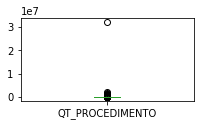

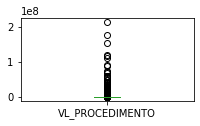

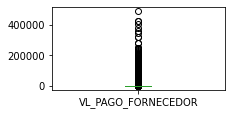

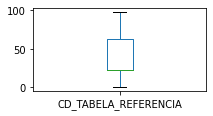

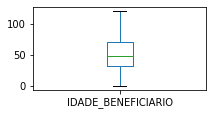

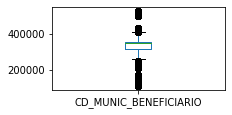

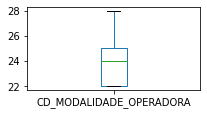

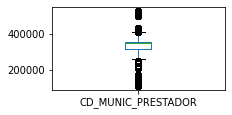

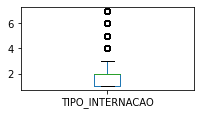

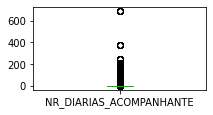

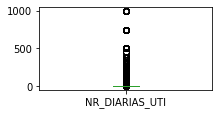

In [13]:
#Construção dos gráficos boxplot de cada classe.

colunas = ['QT_PROCEDIMENTO','VL_PROCEDIMENTO','VL_PAGO_FORNECEDOR',
           'CD_TABELA_REFERENCIA','IDADE_BENEFICIARIO','CD_MUNIC_BENEFICIARIO',
           'CD_MODALIDADE_OPERADORA','CD_MUNIC_PRESTADOR','TIPO_INTERNACAO',
           'NR_DIARIAS_ACOMPANHANTE', 'NR_DIARIAS_UTI',]
#A lista colunas refere-se somente às colunas de valores numéricos do df_completo.

print('BOXPLOT dos dados de cada classe:\n')
for k in range(0,len(colunas)):
  df_completo[colunas[k]].plot(kind='box', subplots=True, layout=(10,5), sharex=False, sharey=False, figsize=(18,18))
  plt.show()

HISTOGRAMAS dos dados de cada classe:



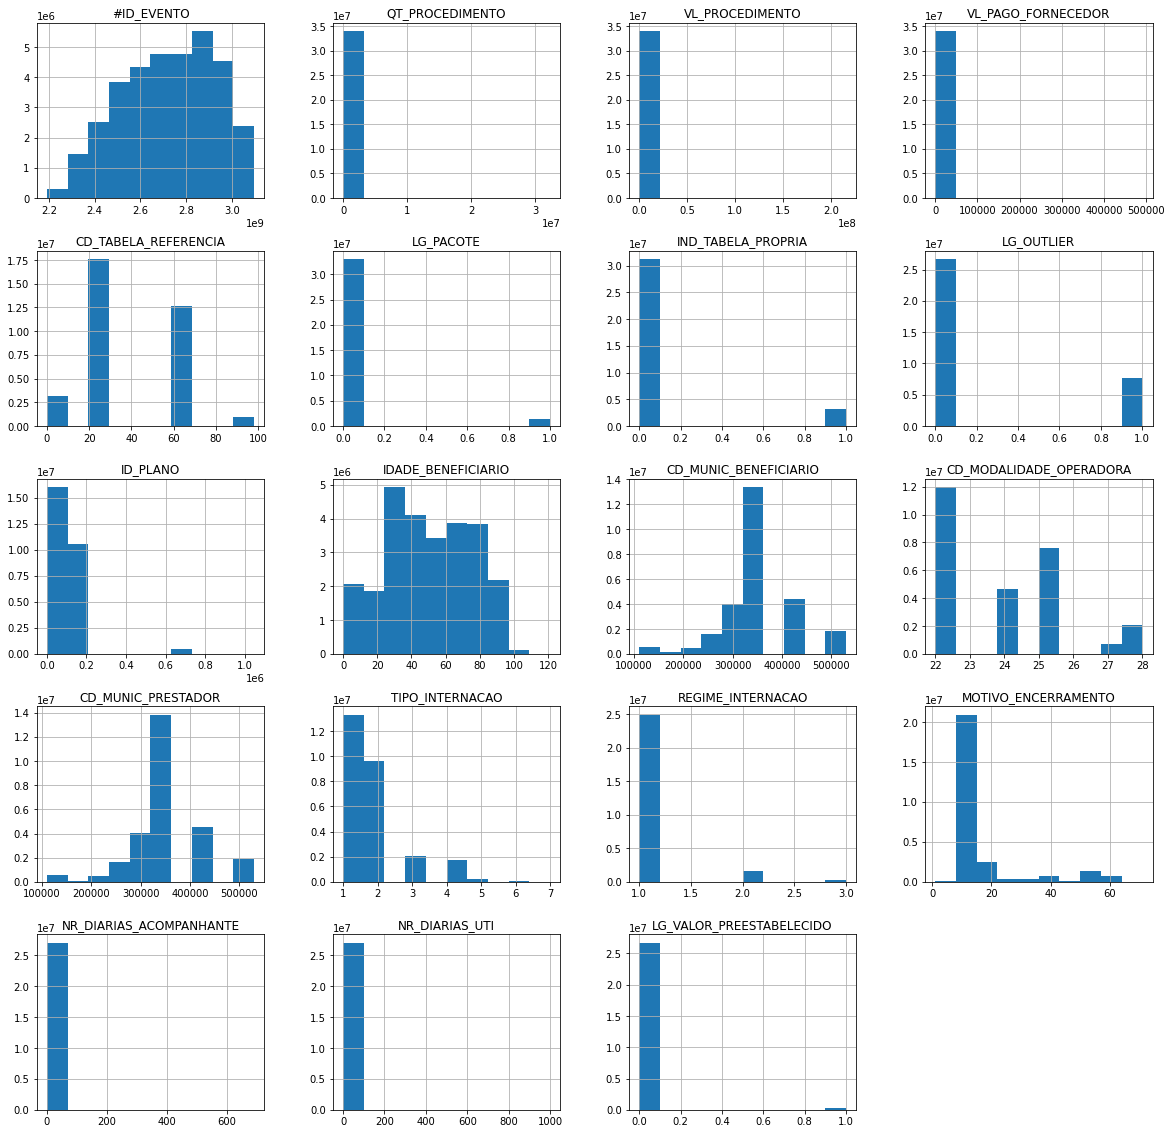

In [14]:
#Construção dos gráficos de histograma de cada classe.

colunas = ['QT_PROCEDIMENTO','VL_PROCEDIMENTO','VL_PAGO_FORNECEDOR',
           'CD_TABELA_REFERENCIA','IDADE_BENEFICIARIO','CD_MUNIC_BENEFICIARIO',
           'CD_MODALIDADE_OPERADORA','CD_MUNIC_PRESTADOR','TIPO_INTERNACAO',
           'NR_DIARIAS_ACOMPANHANTE', 'NR_DIARIAS_UTI',]

print("HISTOGRAMAS dos dados de cada classe:\n")
df_completo.hist(layout=(5,4),figsize=(20,20))
plt.savefig('histogramas.jpg',dpi=200)

Matriz de Correlação - HEATMAP do df_cons:



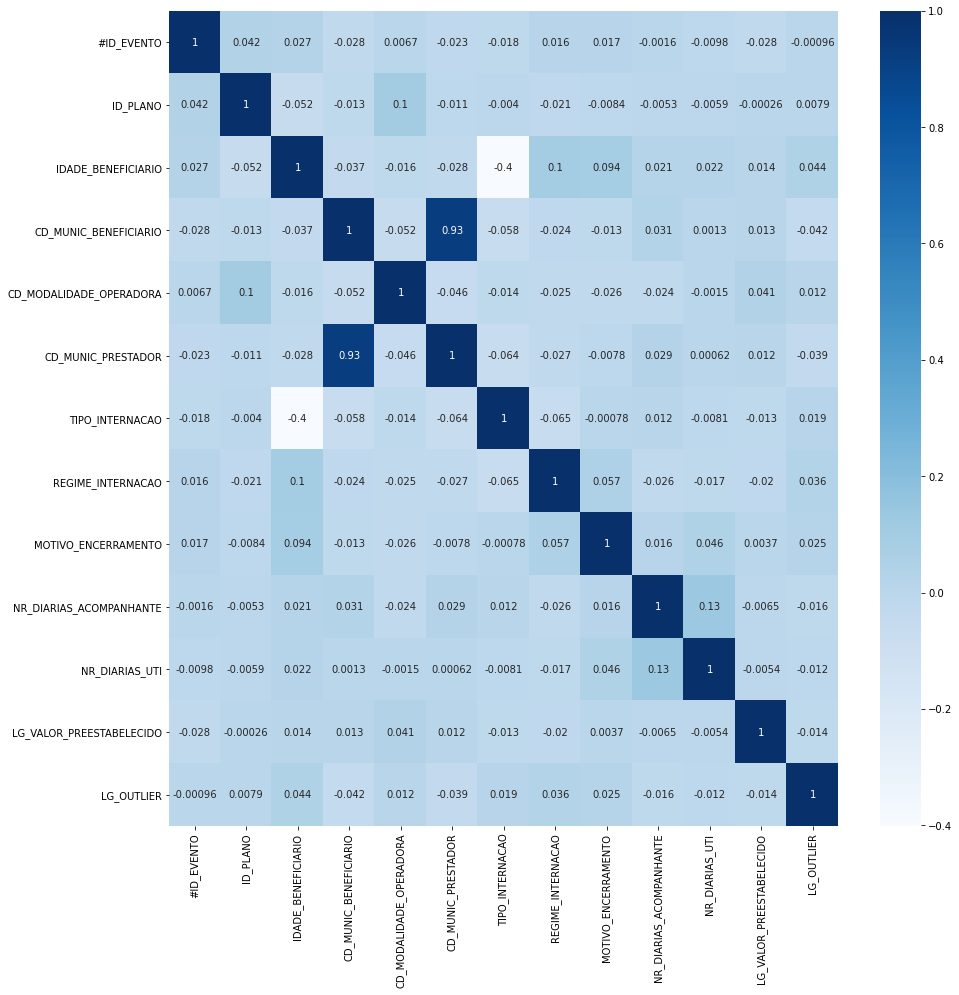

In [15]:
#Construção da matriz de correlação entre as classes do df_cons.

print('Matriz de Correlação - HEATMAP do df_cons:\n')
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_cons.corr(), cmap='Blues', annot=True)
plt.savefig('heatmap_cons.jpg',dpi=200)

Matriz de Correlação - HEATMAP no df_det:



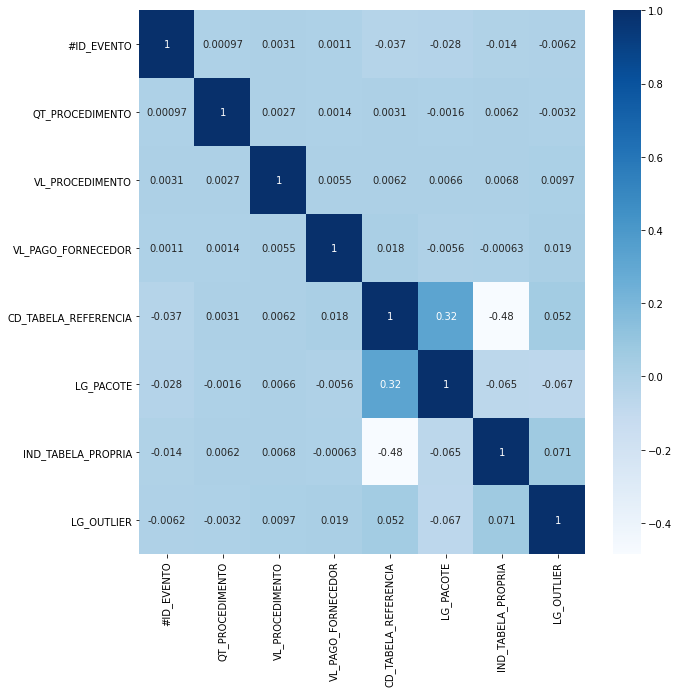

In [16]:
#Construção da matriz de correlação entre as classes do df_det.

print('Matriz de Correlação - HEATMAP no df_det:\n')
plt.figure(figsize=(10,10))
ax=sns.heatmap(df_det.corr(), cmap='Blues', annot=True)
plt.savefig('heatmap_det.jpg',dpi=200)

###Pré-processamento dos Dados

#####Criação de Novas Features

In [6]:
# Quantidade de dias de internação.

d1 = pd.to_datetime(df_completo['DT_SAIDA_INTERNACAO'],dayfirst=True)
d2 = pd.to_datetime(df_completo['DT_INTERNACAO'],dayfirst=True)
df_completo['DIAS_INTERNACAO'] = abs((d2-d1)).astype('timedelta64[D]')

In [7]:
# Quantidade de recorrência de diagnósticos.

df_completo['CID_1_bool'] = np.where(df_completo['CID_1'].isna(), 0, 1)
df_completo['CID_2_bool'] = np.where(df_completo['CID_2'].isna(), 0, 1)
df_completo['CID_3_bool'] = np.where(df_completo['CID_3'].isna(), 0, 1)
df_completo['CID_4_bool'] = np.where(df_completo['CID_4'].isna(), 0, 1)

df_completo['QTD_DIAGNOSTICOS'] = df_completo['CID_1_bool']+df_completo['CID_2_bool']+df_completo['CID_3_bool']+df_completo['CID_4_bool']

#####Remoção de colunas

In [8]:
# Remoção de algumas colunas da tabela consolidada.

del df_completo['DT_INICIO_EVENTO']
del df_completo['MODALIDADE_OPERADORA']
del df_completo['CID_2']
del df_completo['CID_3']
del df_completo['CID_4']
del df_completo['CID_1_bool']
del df_completo['CID_2_bool']
del df_completo['CID_3_bool']
del df_completo['CID_4_bool']
del df_completo['DT_INTERNACAO']
del df_completo['DT_SAIDA_INTERNACAO']

In [9]:
# Visualização da Tabela Filtrada, após a remoção de algumas colunas.

df_completo_filt = df_completo
df_completo_filt

,#ID_EVENTO,CD_TUSS_PROCEDIMENTO,QT_PROCEDIMENTO,VL_PROCEDIMENTO,VL_PAGO_FORNECEDOR,CD_TABELA_REFERENCIA,LG_PACOTE,IND_TABELA_PROPRIA,UF_PRESTADOR,LG_OUTLIER,ID_PLANO,IDADE_BENEFICIARIO,SEXO_BENEFICIARIO,CD_MUNIC_BENEFICIARIO,PORTE_OPERADORA,CD_MODALIDADE_OPERADORA,CD_MUNIC_PRESTADOR,CARATER_ATENDIMENTO,TIPO_INTERNACAO,REGIME_INTERNACAO,MOTIVO_ENCERRAMENTO,CID_1,NR_DIARIAS_ACOMPANHANTE,NR_DIARIAS_UTI,LG_VALOR_PREESTABELECIDO,DIAS_INTERNACAO,QTD_DIAGNOSTICOS
0,2734762035,031,4.0,429.96,0.0,63,0,0,AL,0,117789.0,44.0,M,270430.0,GRANDE,28.0,270430.0,1,2.0,1.0,12.0,NaN,0.0,0.0,0.0,0.0,0
1,3084104673,10103023,1.0,282.56,0.0,22,0,0,AL,0,124053.0,34.0,F,230440.0,GRANDE,28.0,270730.0,2,3.0,1.0,11.0,O420,0.0,0.0,0.0,2.0,1
2,2788329148,029,83.0,563.74,0.0,63,0,0,AL,0,94973.0,43.0,F,270430.0,GRANDE,22.0,270430.0,1,2.0,1.0,12.0,NaN,0.0,0.0,0.0,0.0,0
3,2788329148,030,23.0,220.20,0.0,63,0,0,AL,0,94973.0,43.0,F,270430.0,GRANDE,22.0,270430.0,1,2.0,1.0,12.0,NaN,0.0,0.0,0.0,0.0,0
4,2788329148,031,3.0,490.57,0.0,63,0,0,AL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34445715,3031714068,TABELA PRÓPRIA,5.0,212.94,0.0,0,0,1,TO,0,98151.0,84.0,F,520870.0,GRANDE,22.0,170210.0,1,1.0,1.0,12.0,J159,0.0,0.0,0.0,8.0,1
34445716,3023197219,TABELA PRÓPRIA,1.0,6.11,0.0,0,0,1,TO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
34445717,2991565159,029,47.0,1614.46,1310.0,63,0,0,TO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
34445718,2991565159,030,43.0,229.62,0.0,63,0,0,TO,0,1911.0,17.0,M,170210.0,PEQUENO,22.0,170210.0,1,2.0,1.0,12.0,NaN,1.0,0.0,0.0,1.0,0


#####Tratamento dos Dados Nulos

In [10]:
# Dados estatísticos da feature nova.

df_completo_filt['DIAS_INTERNACAO'].describe()

count    2.699859e+07
mean     1.048489e+01
std      4.195449e+02
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      4.383000e+04
Name: DIAS_INTERNACAO, dtype: float64

In [11]:
# Substituindo os valores nulos pela mediana ou pela média ou pela moda ou por -1 ou por uma string.

col_null = [['QT_PROCEDIMENTO','VL_PROCEDIMENTO','LG_PACOTE','IND_TABELA_PROPRIA','IDADE_BENEFICIARIO','NR_DIARIAS_UTI','NR_DIARIAS_ACOMPANHANTE'],
            ['VL_PAGO_FORNECEDOR'],
            ['TIPO_INTERNACAO','REGIME_INTERNACAO','MOTIVO_ENCERRAMENTO','CD_TABELA_REFERENCIA','DIAS_INTERNACAO','LG_VALOR_PREESTABELECIDO',
             'CD_TUSS_PROCEDIMENTO','CD_MUNIC_PRESTADOR', 'CD_MUNIC_BENEFICIARIO','CD_MODALIDADE_OPERADORA', 'ID_PLANO', 'SEXO_BENEFICIARIO', 'CID_1', 
             'CARATER_ATENDIMENTO','PORTE_OPERADORA']]

for i in range(0,len(col_null)):
  for col in col_null[i]:
    if i == 0:
      df_completo_filt[col].fillna(df_completo_filt[col].median(),inplace=True)
    elif i == 1:
      df_completo_filt[col].fillna(df_completo_filt[col].mean(),inplace=True)
    elif i == 2:
      df_completo_filt[col].fillna(-1,inplace=True)

In [12]:
# Quantidade de valores nulos por coluna da base filtrada após o tratamento.

df_completo_filt.isnull().sum()

#ID_EVENTO                  0
CD_TUSS_PROCEDIMENTO        0
QT_PROCEDIMENTO             0
VL_PROCEDIMENTO             0
VL_PAGO_FORNECEDOR          0
CD_TABELA_REFERENCIA        0
LG_PACOTE                   0
IND_TABELA_PROPRIA          0
UF_PRESTADOR                0
LG_OUTLIER                  0
ID_PLANO                    0
IDADE_BENEFICIARIO          0
SEXO_BENEFICIARIO           0
CD_MUNIC_BENEFICIARIO       0
PORTE_OPERADORA             0
CD_MODALIDADE_OPERADORA     0
CD_MUNIC_PRESTADOR          0
CARATER_ATENDIMENTO         0
TIPO_INTERNACAO             0
REGIME_INTERNACAO           0
MOTIVO_ENCERRAMENTO         0
CID_1                       0
NR_DIARIAS_ACOMPANHANTE     0
NR_DIARIAS_UTI              0
LG_VALOR_PREESTABELECIDO    0
DIAS_INTERNACAO             0
QTD_DIAGNOSTICOS            0
dtype: int64

#####Conversão dos Dados Categóricos em Numéricos

In [13]:
# Substituição dos códigos strings do caráter de atendimento pelos códigos
# numéricos, de acordo com tabela 23 da TUSS.

str_atend = ['E','U','1','2']
int_atend = [1,2,1,2]

df_completo_filt['CARATER_ATENDIMENTO'].replace(str_atend,int_atend,inplace=True)

In [14]:
# Conversão dos dados das colunas SEXO_BENEFICIARIO e CID_1 em strings.

df_completo_filt['CARATER_ATENDIMENTO'] = df_completo_filt['CARATER_ATENDIMENTO'].astype(str)
df_completo_filt['SEXO_BENEFICIARIO'] = df_completo_filt['SEXO_BENEFICIARIO'].astype(str)
df_completo_filt['PORTE_OPERADORA'] = df_completo_filt['PORTE_OPERADORA'].astype(str)
df_completo_filt['CID_1'] = df_completo_filt['CID_1'].astype(str)

In [15]:
# Aplicação da classe LabelEncoder a algumas colunas.

col_object = ['UF_PRESTADOR','CD_TUSS_PROCEDIMENTO','PORTE_OPERADORA','CID_1','SEXO_BENEFICIARIO','CARATER_ATENDIMENTO']

le = LabelEncoder()
for col in col_object:
  df_completo_filt[col] = le.fit_transform(df_completo_filt[col])

In [16]:
# Aplicação da classe One-Hot-Encoder às classes PORTE_OPERADORA e SEXO_BENEFICIARIO.

onehotencoder = OneHotEncoder()
K = onehotencoder.fit_transform(df_completo_filt.PORTE_OPERADORA.values.reshape(-1,1)).toarray()
W = onehotencoder.fit_transform(df_completo_filt.SEXO_BENEFICIARIO.values.reshape(-1,1)).toarray()
Z = onehotencoder.fit_transform(df_completo_filt.CARATER_ATENDIMENTO.values.reshape(-1,1)).toarray()

In [17]:
# Conversão dos arrays K e W OneHot para um Dataframe cada e adição das colunas desses 
# Dataframes (dfOneHot1 e dfOneHot2) ao nosso Dataframe filtrado (df_completo_filt).

dfOneHot1 = pd.DataFrame(K, columns= ['PORTE_OPER_'+str(int(i)) for i in range(K.shape[1])])
dfOneHot2 = pd.DataFrame(W, columns= ['SEXO_'+str(int(i)) for i in range(W.shape[1])])
dfOneHot3 = pd.DataFrame(Z, columns= ['ATEND_'+str(int(i)) for i in range(Z.shape[1])])

df_completo_filt['PORTE_GRANDE'] = dfOneHot1['PORTE_OPER_0']
df_completo_filt['PORTE_MEDIO'] = dfOneHot1['PORTE_OPER_1']
df_completo_filt['PORTE_PEQUENO'] = dfOneHot1['PORTE_OPER_2']
df_completo_filt['PORTE_NAO_INFOR'] = dfOneHot1['PORTE_OPER_3']

df_completo_filt['SEXO_F'] = dfOneHot2['SEXO_1']
df_completo_filt['SEXO_M'] = dfOneHot2['SEXO_2']
df_completo_filt['SEXO_NAO_INFOR'] = dfOneHot2['SEXO_0']

df_completo_filt['ATEND_ELETIVO'] = dfOneHot3['ATEND_1']
df_completo_filt['ATEND_URGENCIA'] = dfOneHot3['ATEND_2']
df_completo_filt['ATEND_NAO_INFOR'] = dfOneHot3['ATEND_0']

del df_completo_filt['PORTE_OPERADORA']
del df_completo_filt['SEXO_BENEFICIARIO']
del df_completo_filt['CARATER_ATENDIMENTO']

print(df_completo_filt.shape)
df_completo_filt.head()

(34445720, 34)


,#ID_EVENTO,CD_TUSS_PROCEDIMENTO,QT_PROCEDIMENTO,VL_PROCEDIMENTO,VL_PAGO_FORNECEDOR,CD_TABELA_REFERENCIA,LG_PACOTE,IND_TABELA_PROPRIA,UF_PRESTADOR,LG_OUTLIER,ID_PLANO,IDADE_BENEFICIARIO,CD_MUNIC_BENEFICIARIO,CD_MODALIDADE_OPERADORA,CD_MUNIC_PRESTADOR,TIPO_INTERNACAO,REGIME_INTERNACAO,MOTIVO_ENCERRAMENTO,CID_1,NR_DIARIAS_ACOMPANHANTE,NR_DIARIAS_UTI,LG_VALOR_PREESTABELECIDO,DIAS_INTERNACAO,QTD_DIAGNOSTICOS,PORTE_GRANDE,PORTE_MEDIO,PORTE_PEQUENO,PORTE_NAO_INFOR,SEXO_F,SEXO_M,SEXO_NAO_INFOR,ATEND_ELETIVO,ATEND_URGENCIA,ATEND_NAO_INFOR
0,2734762035,685,4.0,429.96,0.0,63,0,0,1,0,117789.0,44.0,270430.0,28.0,270430.0,2.0,1.0,12.0,0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3084104673,848,1.0,282.56,0.0,22,0,0,1,0,124053.0,34.0,230440.0,28.0,270730.0,3.0,1.0,11.0,6225,0.0,0.0,0.0,2.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2788329148,682,83.0,563.74,0.0,63,0,0,1,0,94973.0,43.0,270430.0,22.0,270430.0,2.0,1.0,12.0,0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2788329148,684,23.0,220.20,0.0,63,0,0,1,0,94973.0,43.0,270430.0,22.0,270430.0,2.0,1.0,12.0,0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2788329148,685,3.0,490.57,0.0,63,0,0,1,1,-1.0,49.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0.0,0.0,-1.0,-1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
df_completo_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34445720 entries, 0 to 34445719
Data columns (total 34 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   #ID_EVENTO                int64  
 1   CD_TUSS_PROCEDIMENTO      int64  
 2   QT_PROCEDIMENTO           float64
 3   VL_PROCEDIMENTO           float64
 4   VL_PAGO_FORNECEDOR        float64
 5   CD_TABELA_REFERENCIA      int64  
 6   LG_PACOTE                 int64  
 7   IND_TABELA_PROPRIA        int64  
 8   UF_PRESTADOR              int64  
 9   LG_OUTLIER                int64  
 10  ID_PLANO                  float64
 11  IDADE_BENEFICIARIO        float64
 12  CD_MUNIC_BENEFICIARIO     float64
 13  CD_MODALIDADE_OPERADORA   float64
 14  CD_MUNIC_PRESTADOR        float64
 15  TIPO_INTERNACAO           float64
 16  REGIME_INTERNACAO         float64
 17  MOTIVO_ENCERRAMENTO       float64
 18  CID_1                     int64  
 19  NR_DIARIAS_ACOMPANHANTE   float64
 20  NR_DIARIAS_UTI        

#####Normalização dos Dados

In [ ]:
subset = df_completo_filt.sample(frac=0.25)

In [ ]:
# Uso de fórmulas matemáticas para calcular a normalização, usando a amplitude dos dados.
# Método semelhante é usado na classe MinMaxScaler do sklearn.

X=[]

for t in df_completo_filt.columns:
  Min = df_completo_filt[t].min()
  Max = df_completo_filt[t].max()
  Ampl = Max-Min
  if Ampl == 0:
    Ampl = 1
  array = ((df_completo_filt[t].values) - Min) / Ampl
  X.append(array)

np.set_printoptions(precision=3)
print(X)

In [ ]:
# Uso de fórmulas matemáticas para calcular a normalização, usando a distância interquartil.
# Método semelhante é usado na classe RobustScaler do sklearn.

X=[]

for t in df_completo_filt.columns:
  Q1 = df_completo_filt[t].quantile(0.25)
  Q3 = df_completo_filt[t].quantile(0.75)
  IQR = Q3 - Q1 # intervalo interquartílico
  if IQR == 0:
    IQR = 1
  array = ((df_completo_filt[t].values) - Q1) / IQR
  X.append(array)

np.set_printoptions(precision=3)
print(X)

In [ ]:
# Normalização dos dados utilizando-se a classe Normalizer do sklearn.

# obtendo os valores do dataset
X = df_completo_filt.values

# normaliza os dados
scaler = Normalizer() 
normalizedX = scaler.fit_transform(X)

print('DADOS NORMALIZADOS\n')
np.set_printoptions(precision=3)
print(normalizedX)

# Para os demais casos, basta substituir scaler = Normalizer() por
# scaler = RobustScaler() ou StandardScaler() ou MinMaxScaler().